# Loading Libraries

In [1]:
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


# Downloading the Dataset

In [2]:
!kaggle datasets download -d techsash/waste-classification-data

Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
 97% 414M/427M [00:04<00:00, 159MB/s]
100% 427M/427M [00:04<00:00, 103MB/s]


In [3]:
# Checking the current directory
pwd

'/content'

In [4]:
# Unzipping the dataset
!unzip \*.zip


Streaming output truncated to the last 5000 lines.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  i

# Delete the unnecessary files and folders created

In [5]:
import shutil

# Specify the directory path
directory_path = '/content/dataset'

# Delete the directory and all its contents
shutil.rmtree(directory_path)

print(f'The directory "{directory_path}" has been deleted.')


The directory "/content/dataset" has been deleted.


# Check the number of files present

In [6]:
import os

def check_files():
  # Specify the directory path
  directory_path = '/content/DATASET'
  sub_dir= ['TEST/O','TEST/R','TRAIN/O','TRAIN/R','VALIDATION/O','VALIDATION/R']

  for dir in sub_dir:
    path = os.path.join(directory_path,dir)
    if os.path.exists(path):
      num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
      print(f'The number of files in "{path}" is: {num_files}')

check_files()


The number of files in "/content/DATASET/TEST/O" is: 1401
The number of files in "/content/DATASET/TEST/R" is: 1112
The number of files in "/content/DATASET/TRAIN/O" is: 12565
The number of files in "/content/DATASET/TRAIN/R" is: 9999


# Creating Validation Dataset
- The Dataset we have, contains only train and test. There is no validation data. The below code creates a validation data from the training dataset.

In [7]:
import random

def move_images(source_dir, target_dir, num_images):
    # Create the target directory if it doesn't exist
    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    # List all files in the source directory
    files = [f for f in os.listdir(source_dir) if os.path.isfile(os.path.join(source_dir, f))]

    # Randomly select the specified number of files
    selected_files = random.sample(files, num_images)

    # Move the selected files to the target directory
    for file in selected_files:
        shutil.move(os.path.join(source_dir, file), os.path.join(target_dir, file))

# Define the source and target directories
source_dir_O = '/content/DATASET/TRAIN/O'
source_dir_R = '/content/DATASET/TRAIN/R'
target_dir_O = '/content/DATASET/VALIDATION/O'
target_dir_R = '/content/DATASET/VALIDATION/R'

# Number of images to move
num_images_to_move = 1500

# Move images
move_images(source_dir_O, target_dir_O, num_images_to_move)
move_images(source_dir_R, target_dir_R, num_images_to_move)

print(f'Moved {num_images_to_move} images from "{source_dir_O}" to "{target_dir_O}".')
print(f'Moved {num_images_to_move} images from "{source_dir_R}" to "{target_dir_R}".')


Moved 1500 images from "/content/DATASET/TRAIN/O" to "/content/DATASET/VALIDATION/O".
Moved 1500 images from "/content/DATASET/TRAIN/R" to "/content/DATASET/VALIDATION/R".


# Function for plotting the Graphs

In [8]:
import matplotlib.pyplot as plt

def plot_graph(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 1 row and 2 columns

    # Plot training & validation accuracy values
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()


# Loading the dataset

In [9]:

# Define paths
train_dir = '/content/DATASET/TRAIN'
validation_dir = '/content/DATASET/VALIDATION'
test_dir = '/content/DATASET/TEST'

# Parameters
batch_size = 32
img_height = 224
img_width = 224

# Load training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Load validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


# Load test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
# Print class names to verify
class_names = train_ds.class_names
print(class_names)


Found 19564 files belonging to 2 classes.
Found 3000 files belonging to 2 classes.
Found 2513 files belonging to 2 classes.
['O', 'R']


# Checking the data loaded perfectly or not

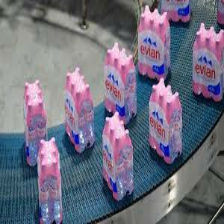

In [10]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


# Get a batch of images and labels
for images, labels in train_ds.take(1):
    first_image = images[3].numpy().astype("uint8")
    first_label = labels[3].numpy()

# Convert the image from RGB to BGR (OpenCV uses BGR by default)
first_image_bgr = cv2.cvtColor(first_image, cv2.COLOR_RGB2BGR)

# Display the image using OpenCV
cv2_imshow( first_image_bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [11]:
first_label

1

In [12]:
# Normalize the datasets
normalization_layer = layers.Rescaling(1./255)

normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))




# Model Building

# ANN

In [36]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [37]:
ann_model = Sequential([
    Flatten(input_shape=(img_width, img_height, 3)),  # Flatten the input image
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
ann_model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

ann_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense_16 (Dense)            (None, 512)               77070848  
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 256)               131328    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               32896     
                                                                 
 dense_19 (Dense)            (None, 1)                

In [38]:
ann_history = ann_model.fit(normalized_train_ds,validation_data=normalized_val_ds,epochs=10)

Epoch 1/10
612/612 [==============================] - 32s 48ms/step - loss: 0.9849 - accuracy: 0.5710 - val_loss: 0.5917 - val_accuracy: 0.6157
Epoch 2/10
612/612 [==============================] - 32s 52ms/step - loss: 0.6151 - accuracy: 0.6390 - val_loss: 0.5857 - val_accuracy: 0.7810
Epoch 3/10
612/612 [==============================] - 30s 48ms/step - loss: 0.6175 - accuracy: 0.6530 - val_loss: 0.6019 - val_accuracy: 0.7447
Epoch 4/10
612/612 [==============================] - 36s 58ms/step - loss: 0.6071 - accuracy: 0.6631 - val_loss: 0.5790 - val_accuracy: 0.7893
Epoch 5/10
612/612 [==============================] - 32s 53ms/step - loss: 0.6051 - accuracy: 0.6784 - val_loss: 0.5710 - val_accuracy: 0.7793
Epoch 6/10
612/612 [==============================] - 30s 49ms/step - loss: 0.5971 - accuracy: 0.6857 - val_loss: 0.5644 - val_accuracy: 0.7920
Epoch 7/10
612/612 [==============================] - 31s 51ms/step - loss: 0.5918 - accuracy: 0.6892 - val_loss: 0.5665 - val_accuracy:

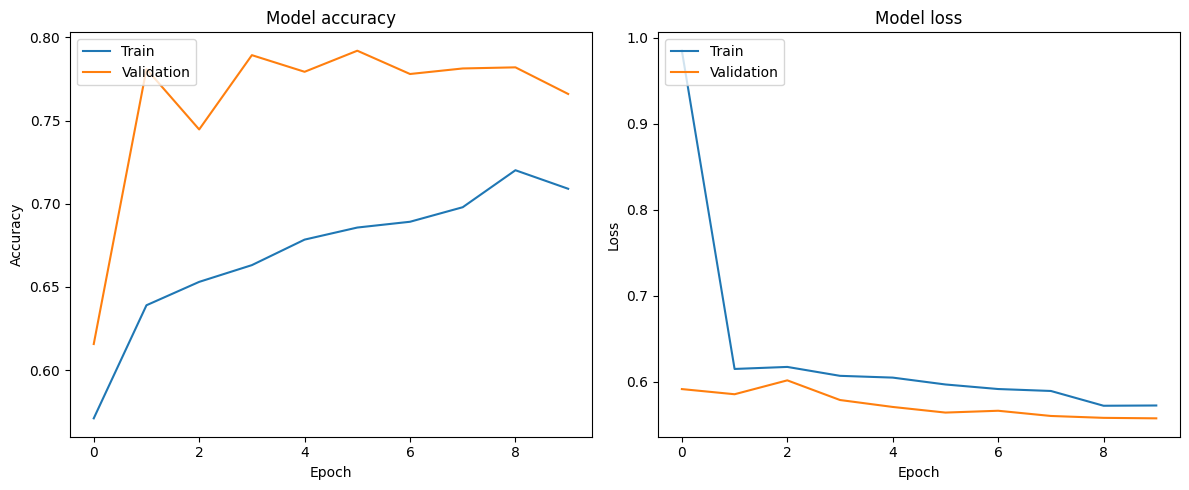

In [39]:
plot_graph(ann_history)

# CNN

In [40]:
from tensorflow.keras.layers import Conv2D , BatchNormalization, MaxPooling2D

In [41]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout_10 (Dropout)        (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)     

In [42]:
cnn_history = cnn_model.fit(normalized_train_ds,validation_data = normalized_val_ds,epochs=10)


Epoch 1/10
612/612 [==============================] - 96s 148ms/step - loss: 0.4969 - accuracy: 0.7967 - val_loss: 0.4461 - val_accuracy: 0.7940
Epoch 2/10
612/612 [==============================] - 89s 145ms/step - loss: 0.3802 - accuracy: 0.8381 - val_loss: 0.4573 - val_accuracy: 0.8133
Epoch 3/10
612/612 [==============================] - 89s 144ms/step - loss: 0.3394 - accuracy: 0.8571 - val_loss: 0.4897 - val_accuracy: 0.8253
Epoch 4/10
612/612 [==============================] - 89s 144ms/step - loss: 0.3150 - accuracy: 0.8690 - val_loss: 0.3033 - val_accuracy: 0.8763
Epoch 5/10
612/612 [==============================] - 87s 142ms/step - loss: 0.2923 - accuracy: 0.8819 - val_loss: 0.5597 - val_accuracy: 0.7943
Epoch 6/10
612/612 [==============================] - 88s 143ms/step - loss: 0.2711 - accuracy: 0.8914 - val_loss: 0.3267 - val_accuracy: 0.8790
Epoch 7/10
612/612 [==============================] - 86s 140ms/step - loss: 0.2371 - accuracy: 0.9034 - val_loss: 0.3712 - val_ac

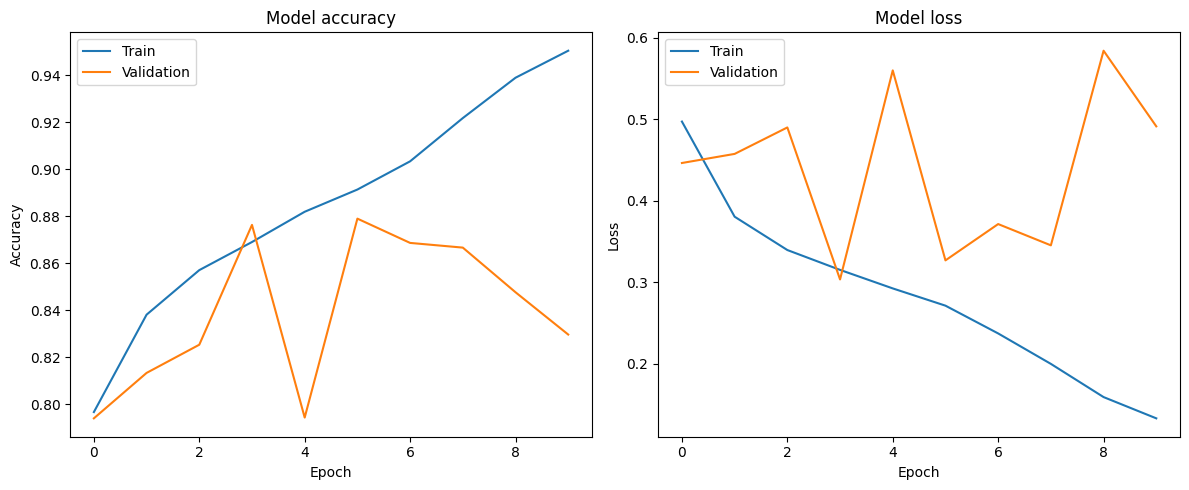

In [44]:
plot_graph(cnn_history)

# VGG16

In [45]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model


In [46]:
# Load the pre-trained VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Freeze the layers of the pre-trained model
base_model.trainable=False

# Unfreezing some layers for model fine tuning
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Add  layers on top
x = Flatten()(base_model.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
vgg_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
vgg_model.compile(optimizer=Adam(learning_rate=1e-6), loss='binary_crossentropy', metrics=['accuracy'])

vgg_model.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [47]:
vgg_history = vgg_model.fit(normalized_train_ds,validation_data=normalized_val_ds,epochs=10)

Epoch 1/10
612/612 [==============================] - 128s 192ms/step - loss: 0.4220 - accuracy: 0.8149 - val_loss: 0.3227 - val_accuracy: 0.8730
Epoch 2/10
612/612 [==============================] - 117s 190ms/step - loss: 0.2745 - accuracy: 0.8928 - val_loss: 0.2583 - val_accuracy: 0.8993
Epoch 3/10
612/612 [==============================] - 117s 190ms/step - loss: 0.2269 - accuracy: 0.9121 - val_loss: 0.2281 - val_accuracy: 0.9123
Epoch 4/10
612/612 [==============================] - 108s 176ms/step - loss: 0.1967 - accuracy: 0.9251 - val_loss: 0.2167 - val_accuracy: 0.9173
Epoch 5/10
612/612 [==============================] - 108s 176ms/step - loss: 0.1744 - accuracy: 0.9329 - val_loss: 0.1946 - val_accuracy: 0.9237
Epoch 6/10
612/612 [==============================] - 108s 176ms/step - loss: 0.1560 - accuracy: 0.9416 - val_loss: 0.1855 - val_accuracy: 0.9273
Epoch 7/10
612/612 [==============================] - 117s 190ms/step - loss: 0.1410 - accuracy: 0.9481 - val_loss: 0.1782 -

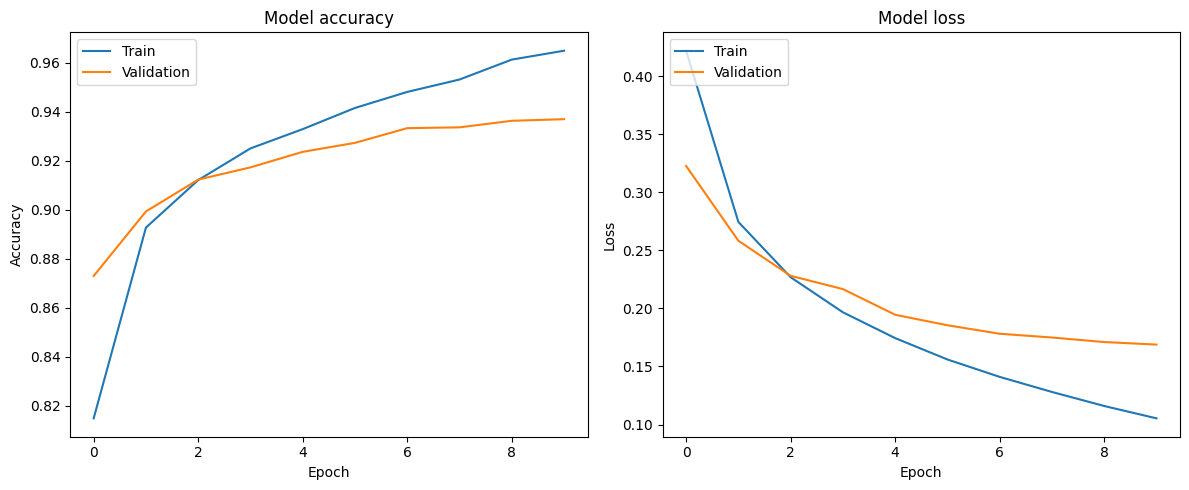

In [49]:
plot_graph(vgg_history)

# ResNet

In [50]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D , Dropout


In [51]:
# Load a pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width,img_width, 3))

# Freeze the base model
base_model.trainable = False

for layer in base_model.layers[-10:]:
    layer.trainable = True

# Add new top layers for binary classification
resnet_model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256,activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])

# Compile the model
resnet_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
resnet_model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_8  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_24 (Dense)            (None, 256)               524544    
                                                                 
 dropout_14 (Dropout)        (None, 256)               0         
                                                                 
 dense_25 (Dense)            (None, 1)                 257       
                                                                 
Total params: 24112513 (91.98 MB)
Trainable params: 52

In [52]:
resnet_history = resnet_model.fit(normalized_train_ds,validation_data=normalized_val_ds,epochs=10)

Epoch 1/10
612/612 [==============================] - 79s 120ms/step - loss: 0.5743 - accuracy: 0.7083 - val_loss: 0.5280 - val_accuracy: 0.7490
Epoch 2/10
612/612 [==============================] - 71s 116ms/step - loss: 0.5329 - accuracy: 0.7405 - val_loss: 0.5133 - val_accuracy: 0.7587
Epoch 3/10
612/612 [==============================] - 70s 113ms/step - loss: 0.5084 - accuracy: 0.7575 - val_loss: 0.5264 - val_accuracy: 0.7393
Epoch 4/10
612/612 [==============================] - 69s 112ms/step - loss: 0.5053 - accuracy: 0.7561 - val_loss: 0.5558 - val_accuracy: 0.7273
Epoch 5/10
612/612 [==============================] - 70s 115ms/step - loss: 0.4909 - accuracy: 0.7696 - val_loss: 0.4865 - val_accuracy: 0.7730
Epoch 6/10
612/612 [==============================] - 70s 114ms/step - loss: 0.4783 - accuracy: 0.7749 - val_loss: 0.4829 - val_accuracy: 0.7777
Epoch 7/10
612/612 [==============================] - 70s 114ms/step - loss: 0.4819 - accuracy: 0.7725 - val_loss: 0.4864 - val_ac

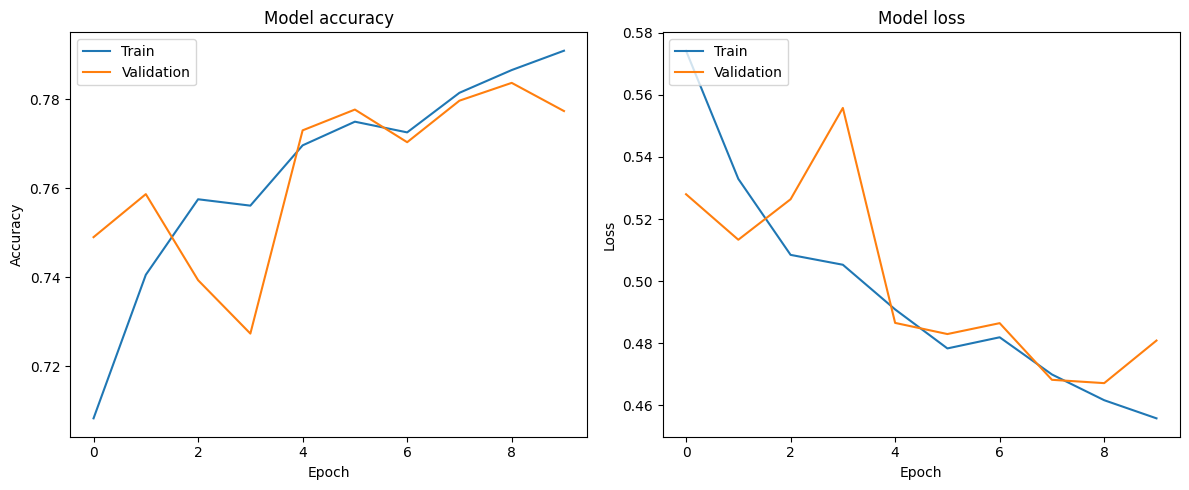

In [53]:
plot_graph(resnet_history)

# MobileNetV2

In [58]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import RMSprop


In [59]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Fine-tuning: Unfreeze some layers of the base model
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Add custom layers on top of the base model
mobilenet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
mobilenet_model.compile(optimizer=RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])
mobilenet_model.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_9  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_26 (Dense)            (None, 256)               327936    
                                                                 
 dropout_15 (Dropout)        (None, 256)               0         
                                                                 
 dense_27 (Dense)            (None, 1)                 257       
                                                                 
Total params: 2586177 (9.87 MB)
Trainable params: 218

In [60]:
mobilenet_history = mobilenet_model.fit(normalized_train_ds,validation_data=normalized_val_ds,epochs=8)

Epoch 1/8
612/612 [==============================] - 50s 72ms/step - loss: 0.2494 - accuracy: 0.9081 - val_loss: 0.4931 - val_accuracy: 0.8877
Epoch 2/8
612/612 [==============================] - 42s 69ms/step - loss: 0.1715 - accuracy: 0.9365 - val_loss: 3.7807 - val_accuracy: 0.6883
Epoch 3/8
612/612 [==============================] - 44s 71ms/step - loss: 0.1329 - accuracy: 0.9525 - val_loss: 2.0640 - val_accuracy: 0.8540
Epoch 4/8
612/612 [==============================] - 42s 69ms/step - loss: 0.1052 - accuracy: 0.9633 - val_loss: 1.2584 - val_accuracy: 0.8940
Epoch 5/8
612/612 [==============================] - 44s 71ms/step - loss: 0.0821 - accuracy: 0.9710 - val_loss: 1.0975 - val_accuracy: 0.9173
Epoch 6/8
612/612 [==============================] - 44s 71ms/step - loss: 0.0633 - accuracy: 0.9783 - val_loss: 0.6710 - val_accuracy: 0.9340
Epoch 7/8
612/612 [==============================] - 43s 70ms/step - loss: 0.0511 - accuracy: 0.9821 - val_loss: 0.6188 - val_accuracy: 0.9410

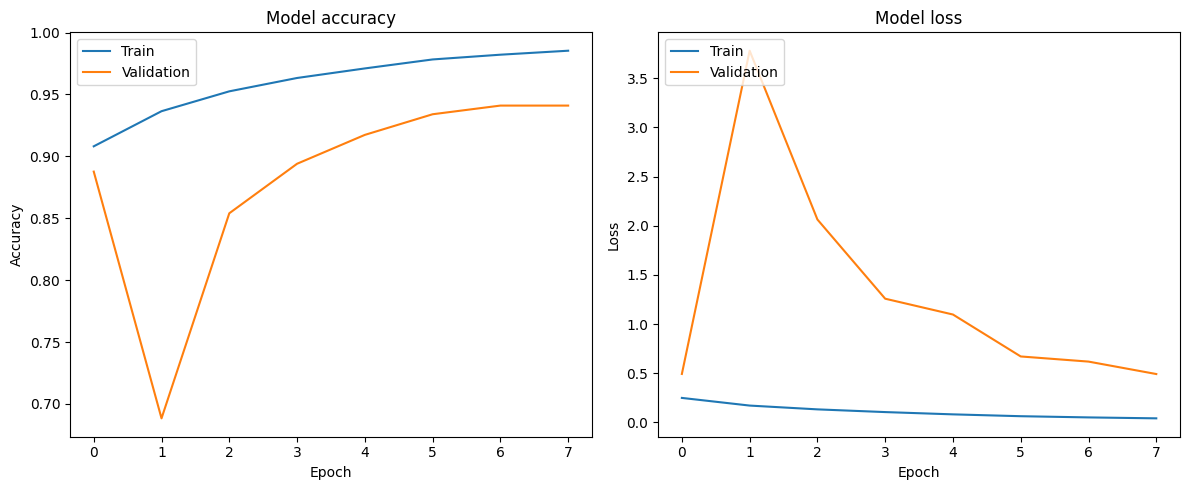

In [61]:
plot_graph(mobilenet_history)



# Model Testing and Evaluation

In [65]:

# ANN Model
ann_loss, ann_accuracy = ann_model.evaluate(normalized_test_ds)
print("ANN Accuracy: {:.2f}%".format(ann_accuracy * 100))



79/79 [==============================] - 3s 33ms/step - loss: 0.5213 - accuracy: 0.8173
ANN Accuracy: 81.73%


In [64]:
# CNN Model
cnn_loss, cnn_accuracy = cnn_model.evaluate(normalized_test_ds)
print("CNN Accuracy: {:.2f}%".format(cnn_accuracy * 100))


79/79 [==============================] - 3s 37ms/step - loss: 0.3933 - accuracy: 0.8731
CNN Accuracy: 87.31%


In [66]:
# VGG Model
vgg_loss, vgg_accuracy = vgg_model.evaluate(normalized_test_ds)
print("VGG Accuracy: {:.2f}%".format(vgg_accuracy * 100))



79/79 [==============================] - 10s 123ms/step - loss: 0.2617 - accuracy: 0.9065
VGG Accuracy: 90.65%


In [67]:
# ResNet Model
resnet_loss, resnet_accuracy = resnet_model.evaluate(normalized_test_ds)
print("ResNet Accuracy: {:.2f}%".format(resnet_accuracy * 100))


79/79 [==============================] - 8s 97ms/step - loss: 0.5250 - accuracy: 0.7688
ResNet Accuracy: 76.88%


In [68]:
# MobileNet Model
mobilenet_loss, mobilenet_accuracy = mobilenet_model.evaluate(normalized_test_ds)
print("MobileNet Accuracy: {:.2f}%".format(mobilenet_accuracy * 100))


79/79 [==============================] - 4s 44ms/step - loss: 1.0736 - accuracy: 0.9085
MobileNet Accuracy: 90.85%


# Conclusions

# Tabulating the models and their Accuracy

| Model              | Architecture                | Accuracy in % (on testing data) |
|--------------------|:---------------------------:|:------------------------------:|
| Model 1            | ANN Model                   | 81.73                          |
| Model 2            | Basic CNN Model             | 87.31                          |
| Model 3            | VGG16 Model                 |  90.65                          |
| Model 4            | ResNet Model                | 76.88                          |
| Model 5            | MobileNetV2 Model       | 90.85                          |


**Key Observations:**

1. **Artificial Neural Network (ANN) Model**: Achieved an accuracy of 81.73%. While it provided a decent baseline, it was outperformed by the other convolutional neural network-based models.

2. **Basic CNN Model**: Improved accuracy significantly to 87.31%, demonstrating the power of convolutional layers in image classification tasks.

3. **VGG16 Model**: Achieved an impressive accuracy of 90.65%. This pre-trained model showed strong performance, indicating the benefits of transfer learning.

4. **ResNet Model**: Obtained an accuracy of 76.88%, which was lower than expected. This might be due to overfitting or insufficient fine-tuning.

5. **MobileNetV2 Model**: Achieved the highest accuracy of 90.85%. This lightweight model is particularly suitable for deployment in resource-constrained environments.

**Conclusion:**

The MobileNetV2 model emerged as the best-performing model for the waste classification task, with an accuracy of 90.85%. Its balance of high accuracy and computational efficiency makes it an excellent choice for practical applications. The VGG16 model also performed very well and could be a suitable alternative depending on the specific use case requirements.

Further improvements can be made by fine-tuning the models, exploring additional data augmentation techniques, and experimenting with different hyperparameters.




